In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import ipywidgets as widgets
import pandas as pd
%matplotlib inline

In [319]:
def phi(t, n):
    if 0 <= t < n:
        return np.floor(2 ** n * t) / (2 ** n)
    else:
        return n
phi = np.vectorize(phi)

def simple_f_approx(fx, n):
    plt.figure(figsize=(15,10))
    x = np.linspace(-3, 3, 1000)

    sf = phi(fx(x), n)
    plt.plot(x, sf, linewidth=1)
    plt.plot(x, fx(x), alpha=0.5, linewidth=1)
    plt.show()
    
def sfuncs(fx, x, n):
    """
    :param fx: the function to 'simplify'
    :param x: a range of values to pass
    :param n: the number of partitions to do
    """
    f = np.vectorize(fx)
    return phi(f(x), n)

def plot_simplef(fx, x, n, kwargs):
    y = sfuncs(fx, x, n)
    ranges = pd.Series(y).value_counts()
    for ypart in ranges.index:
        plt.axhline(ypart, alpha=0.1, color="gray")
        
    plt.plot(x, y, linewidth=1, **kwargs)
    plt.show()
    
def plot_simplef2(ax, fx, X, n):
    Y = phi(fx(X), n)
    for ix, (x, y) in enumerate(zip(X, Y)):
        ax.scatter(x, y, s=5, c="teal")
        if ix + 1 < len(X):
            ax.hlines(y, x, X[ix+1], linewidth=1)

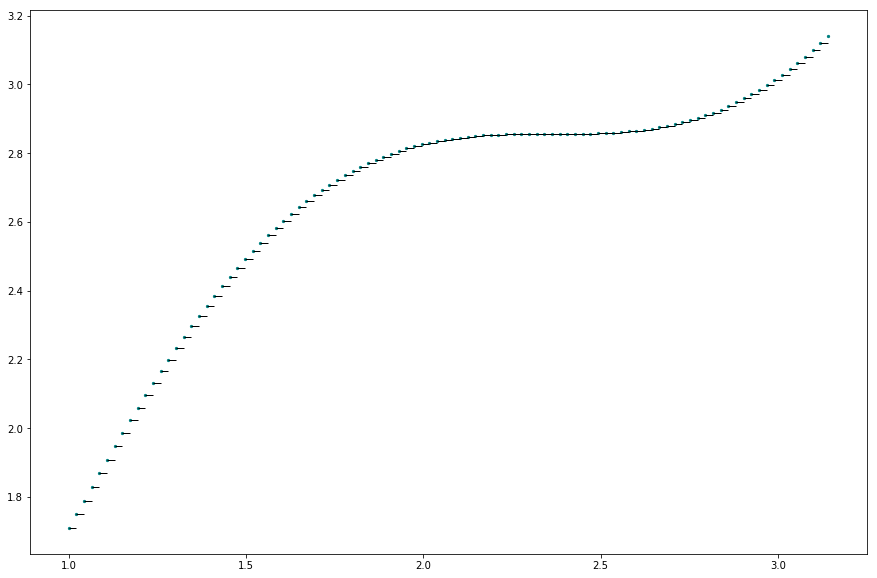

In [314]:
plt.figure(figsize=(15,10))
plot_simplef2(f, X, 10)

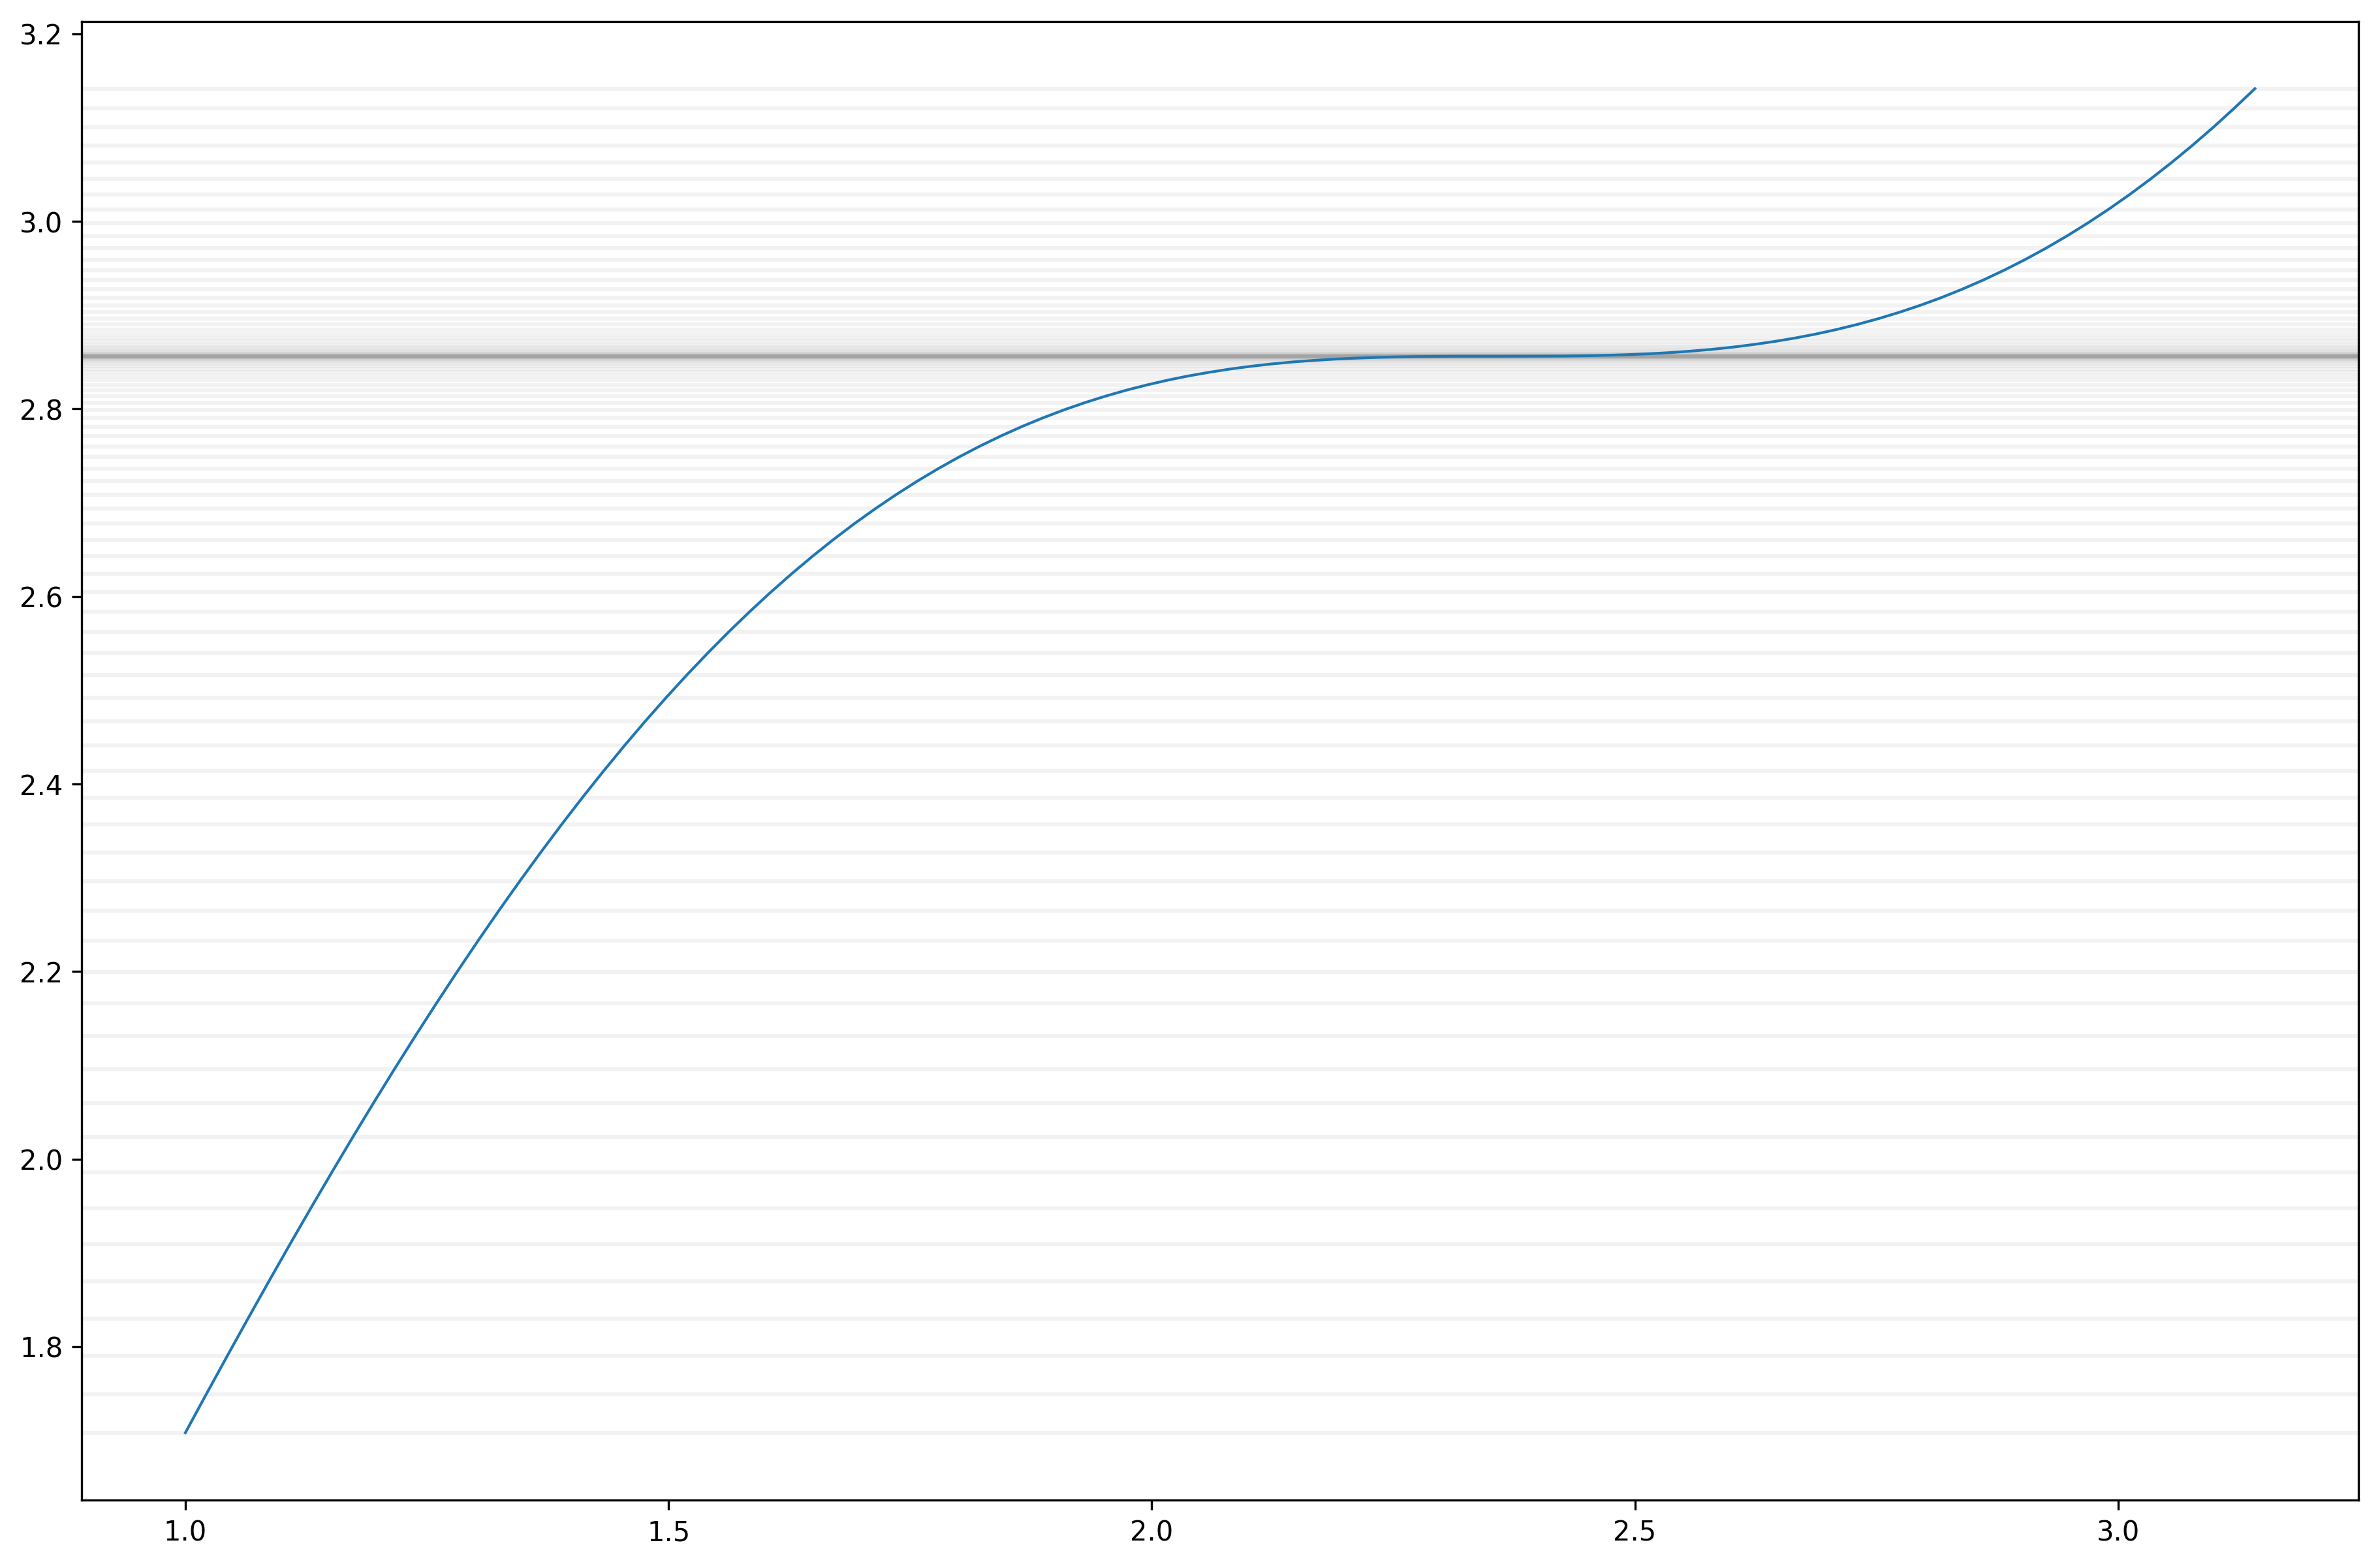

In [327]:
plt.figure(figsize=(15,10), dpi=300)
X = np.linspace(1, np.pi, 100)
plot_simplef(f, X, 14, {})

In [250]:
X = np.linspace(1, np.pi, 100)
f = lambda x: np.sin(x) ** 2 + x
interact(plot_simplef, fx=fixed(f), x=fixed(X.tolist()), kwargs=fixed({"s":1}),
         n=widgets.IntSlider(min=2,max=20,step=1));

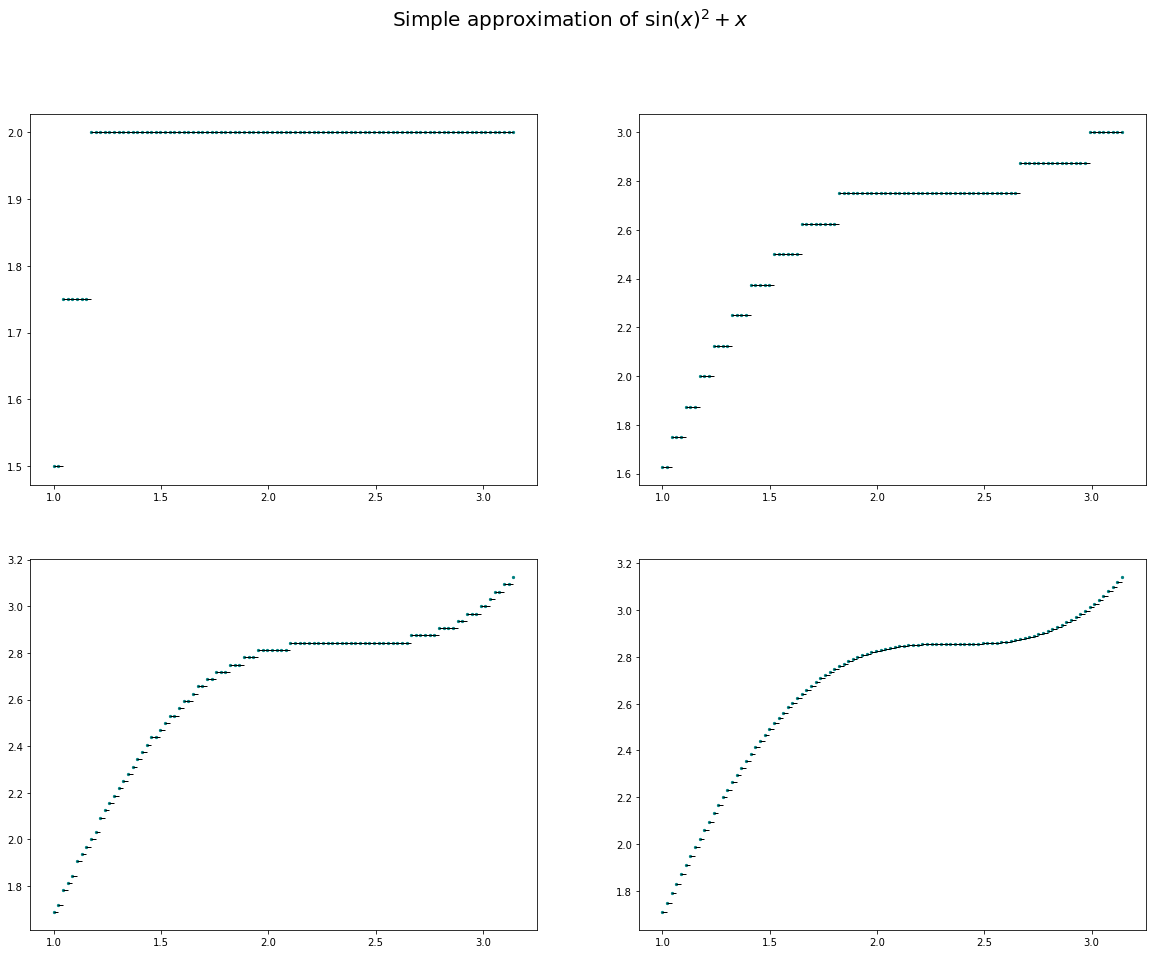

In [332]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

plot_simplef2(ax1, f, X, 2)
plot_simplef2(ax2, f, X, 3)
plot_simplef2(ax3, f, X, 5)
plot_simplef2(ax4, f, X, 20)

fig.suptitle("Simple approximation of $\sin(x)^2 + x$", fontsize=20)
plt.show();